In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('insurance.csv')

In [98]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [99]:
df.shape

(1338, 7)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [101]:
# no null or nan values are present 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [102]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [103]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [104]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [105]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='charges'>

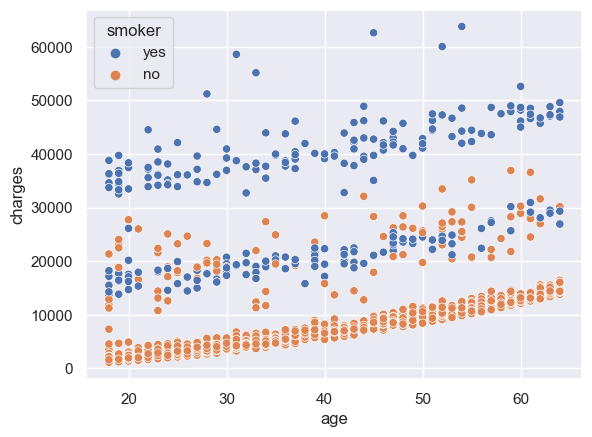

In [106]:
sns.scatterplot(data=df,x='age',y='charges',hue='smoker')

<Axes: xlabel='bmi', ylabel='charges'>

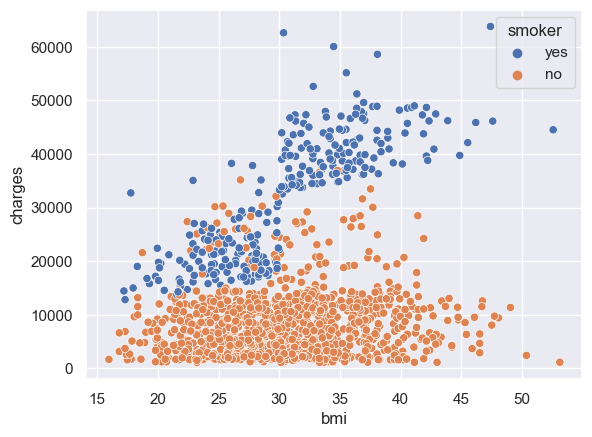

In [107]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker')

C:\Users\abdul\AppData\Local\Temp\ipykernel_18580\630172834.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i)


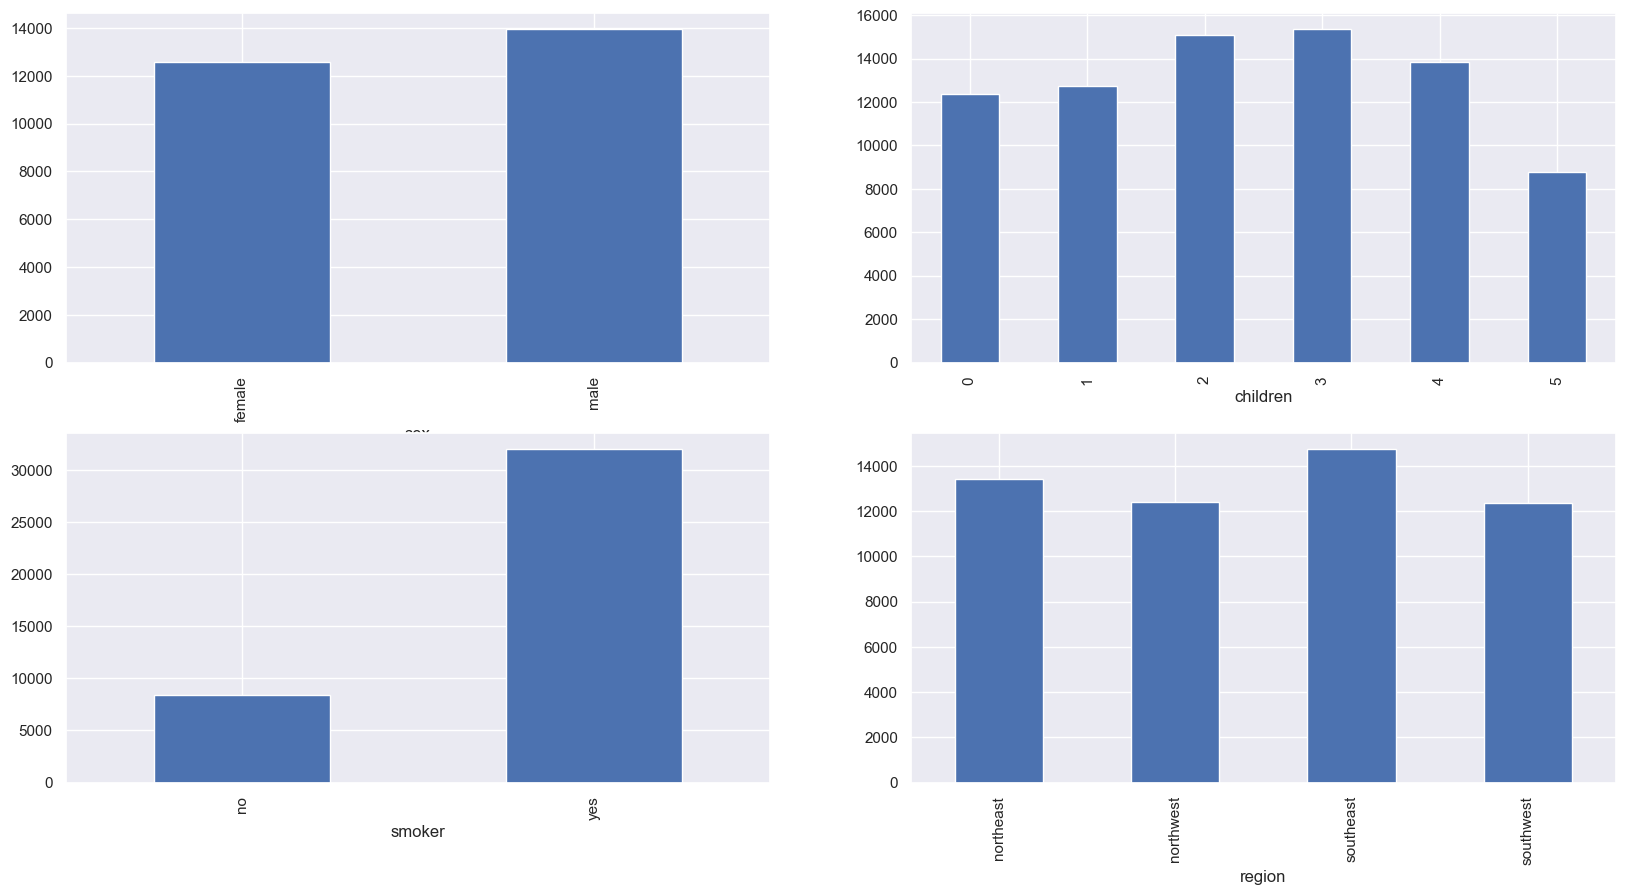

In [108]:
features = ['sex', 'children', 'smoker', 'region']
  
plt.subplots(figsize=(20, 10))
i=1
for col in features:
    plt.subplot(2, 2, i)
    i=i+1
    df.groupby(col)['charges'].mean().plot.bar()
plt.show()

C:\Users\abdul\AppData\Local\Temp\ipykernel_18580\3930521526.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,i)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


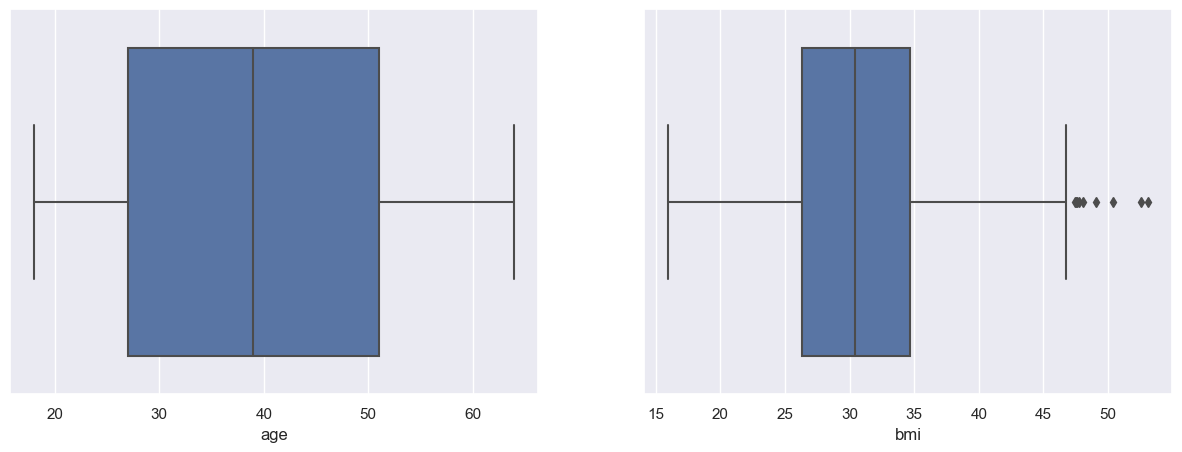

In [109]:
plt.subplots(figsize=(15,5))
features=['age','bmi']
i=1
for col in features:
    plt.subplot(1,2,i)
    i=i+1
    sns.boxplot(df[col])
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='bmi'>

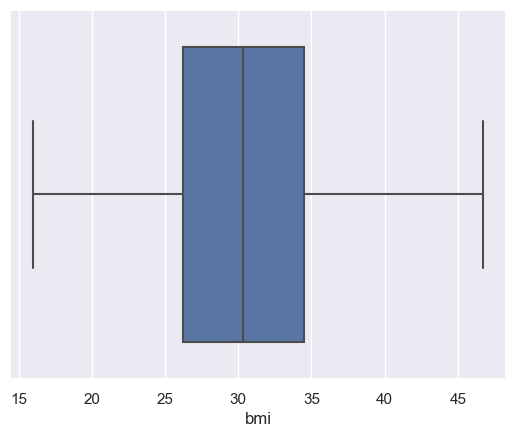

In [110]:
sns.boxplot(df[df['bmi']<47]['bmi'])

In [111]:
df=df[df['bmi']<47]
df.shape

(1329, 7)

In [112]:
X=df.drop('charges',axis=1)
y=df.charges

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [114]:
X_train.shape,X_test.shape

((1063, 6), (266, 6))

In [115]:
X_train.head()

,age,sex,bmi,children,smoker,region
989,24,female,20.520,0,yes,northeast
447,56,female,25.650,0,no,northwest
205,28,female,28.880,1,no,northeast
354,18,female,38.280,0,no,southeast
657,27,male,33.155,2,no,northwest


In [116]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse=False)
X_train_new=ohe.fit_transform(X_train[['sex','smoker','region']])
X_test_new=ohe.transform(X_test[['sex','smoker','region']])


C:\Users\abdul\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [117]:
X_train_new.shape

(1063, 5)

In [118]:
X_train_final=np.hstack((X_train[['age','bmi','children']].values,X_train_new))
X_test_final=np.hstack((X_test[['age','bmi','children']].values,X_test_new))

In [119]:
X_train_final.shape,X_test_final.shape

((1063, 8), (266, 8))

In [120]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [121]:
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
xgb=XGBRegressor()
rf=RandomForestRegressor()
adb=AdaBoostRegressor()

In [122]:
models={
    'LinearRegression':lr,
    'Lasso':lasso,
    'Ridge':ridge,
    'XGBoost':xgb,
    'Randomforest':rf,
    'Adaboost':adb
}

In [123]:
from sklearn.metrics import r2_score
def train_regressor(regressor,X_train,y_train,X_test,y_test):
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
    return r2_score(y_test,y_pred)


In [124]:
r2_scores=[]
for name,reg in models.items():
    curr_r2_score=train_regressor(reg,X_train_final,y_train,X_test_final,y_test)
    print('model - ',name)
    print('r2 score - ',curr_r2_score)
    r2_scores.append(curr_r2_score)

model -  LinearRegression
r2 score -  0.6920096132600579
model -  Lasso
r2 score -  0.6921982027140186
model -  Ridge
r2 score -  0.6935518033943795
model -  XGBoost
r2 score -  0.7666193034354243
model -  Randomforest
r2 score -  0.8131603128706375
model -  Adaboost
r2 score -  0.8065394377534474


In [125]:
from sklearn.ensemble import VotingRegressor
voting = VotingRegressor(estimators=[('xgb',xgb),('rf',rf),('adb',adb)])

In [126]:
voting.fit(X_train_final,y_train)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...)),
                            ('rf', RandomForestRegressor()),
                            ('adb', AdaBoostRegressor())])

In [127]:
y_pred=voting.predict(X_test_final)
print('r2 score of voting regressor - ',r2_score(y_test,y_pred))

r2 score of voting regressor -  0.8120067168504411


In [128]:
import pickle
pickle.dump(voting,open('voting_regressor_model.pkl','wb'))